In [1]:
from math import pi,exp
from math import sqrt as sq
import import_ipynb
import SH_module as sh
from geometry import topography 
import utils as u
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt

importing Jupyter notebook from SH_module.ipynb
importing Jupyter notebook from geometry.ipynb
importing Jupyter notebook from utils.ipynb


In [2]:
f = 0.5 # Hertz
w = 2*pi*f # rad/s
beta = 0.3 # km/s
lambd = beta/f # long de onda en kilometros
k = w / beta # 1/km
rho = 0.3
mu = beta**2 * rho # 2nd Lame constant
# fuente puntual (antiplana) en
XI = (0.5,1)
# receptor 
XX = (1,1)

In [3]:
print(f"En la frecuencia {f} Hz, \lambda = {lambd} km")

En la frecuencia 0.5 Hz, \lambda = 0.6 km


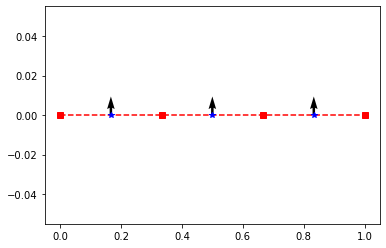

In [4]:
chunk=4; L=1;
vert,p_col,norm=topography(L,chunk).get_data()

In [5]:
norm

array([[-0.,  1.],
       [-0.,  1.],
       [-0.,  1.]])

$$0.5 \delta_{ij} \phi_j(x) + \int_S \phi_j(x) T_{ij} (x,\xi) dS_\xi ) = -t_i^{(0)} (x)$$

In [6]:
# para cada punto de colocacion (renglon), la integral de las fuentes sobre la superficie
T=np.zeros([len(p_col),len(p_col)])
T = T + 0j*T
print(f"T de tamaño {T.shape}")
for i_x in range(len(p_col)):
    for i_xi in range(len(p_col)):
        if u.Kron(i_x,i_xi)==1:
            T[i_x,i_xi]=0.5+0j
        else:
            T[i_x,i_xi]=u.Int_T22_uniforme_en_xi(i_x,i_xi,k,vert,p_col,norm)

T de tamaño (3, 3)


In [7]:
# fuente
Fue=np.zeros([len(p_col),1])
Fue = Fue + 0j*Fue
print(f"B de tamaño {Fue.shape}")
for i_x in range(len(p_col)):
    Fue[i_x]=sh.T22(k, p_col[i_x,:], XI, norm[i_x,:])

B de tamaño (3, 1)


In [8]:
T

array([[0.5+0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0.5+0.j]])

In [9]:
Fue

array([[-0.38878721+0.45352782j],
       [-0.61819347+0.18951674j],
       [-0.38878721+0.45352782j]])

In [10]:
# encontrar amplitudes phi de la densidad de fuerza: phi dS
phi = np.linalg.solve(T,Fue)

In [11]:
phi

array([[-0.77757442+0.90705564j],
       [-1.23638694+0.37903348j],
       [-0.77757442+0.90705564j]])

In [12]:
# graficar phi
phi_gX=[abs(phi[i]) * norm[i,0] for i in range(len(p_col))]
phi_gZ=[abs(phi[i]) * norm[i,1] for i in range(len(p_col))]

In [13]:
phi_gX

[array([-0.]), array([-0.]), array([-0.])]

In [14]:
phi_gZ

[array([1.19472671]), array([1.29318176]), array([1.19472671])]

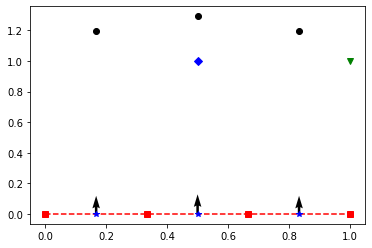

In [15]:
plt.plot(vert[:,0],vert[:,1],'--rs')
plt.plot(p_col[:,0],p_col[:,1],'b*')
plt.quiver(p_col[:,0],p_col[:,1],phi_gX,phi_gZ)
plt.scatter(p_col[:,0],phi_gZ,color='black')
plt.plot(XI[0],XI[1],'bD')# fuente
plt.plot(XX[0],XX[1],'gv')# receptor
plt.show()

In [16]:
# ahora para construir la solucion en un observador cualquiera se hace

V = sh.G22(k,XX,XI,beta,rho)
for i_xi in range(len(p_col)):
    V+=phi[i_xi]*sh.G22(k,XX,p_col[i_xi,:],beta,rho)

print(f"En {XX}, V = {V}")

En (1, 1), V = [-0.04664576+1.67624101j]
